In [25]:
!which python

/Users/ahmadabdullahtariq/Documents/Projects/Thesis/.venv/bin/python


# SVR
- https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively
- https://stats.stackexchange.com/questions/13194/support-vector-machines-and-regression

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from sklearn.svm import SVR,LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (30, 8)
mpl.rcParams['axes.grid'] = True

In [2]:
df = pd.read_pickle('../dataset/preprocessed/284_imputed.pkl')


print(df.isna().sum())

print(df.dtypes)

DOA        0
DBA        0
LAR      540
ADR      540
Rooms      0
ROH        0
dtype: int64
DOA       object
DBA      float64
LAR      float64
ADR      float64
Rooms    float64
ROH      float64
dtype: object


## Preprocessing

In [3]:
# drop Null entries
df = df[~df['LAR'].isna()]

df['DOA'] = pd.to_datetime(df['DOA'])

df['DOW'] = df['DOA'].dt.dayofweek
df['Mon'] = df['DOA'].dt.month
df['Day'] = df['DOA'].dt.day

# just to make DOA unique
df['DOA'] = df['DOA']+df['DBA'].apply(lambda x: timedelta(minutes=(1440-((x+1)*16)))) 
df = df.set_index('DOA')

df.head()

,DBA,LAR,ADR,Rooms,ROH,DOW,Mon,Day
DOA,,,,,,,,
2018-01-01 00:00:00,89.0,40.47,40.470000,290.0,209.0,0,1,1
2018-01-01 00:16:00,88.0,40.47,40.470000,290.0,206.0,0,1,1
2018-01-01 00:32:00,87.0,36.03,69.386667,290.0,206.0,0,1,1
2018-01-01 00:48:00,86.0,36.03,69.386667,290.0,198.0,0,1,1
2018-01-01 01:04:00,85.0,40.47,40.470000,290.0,204.0,0,1,1


## Test/Train Split 

In [4]:
index = int(len(df)*0.8)
train = df[:index]
test  = df[index:]

## Visualization

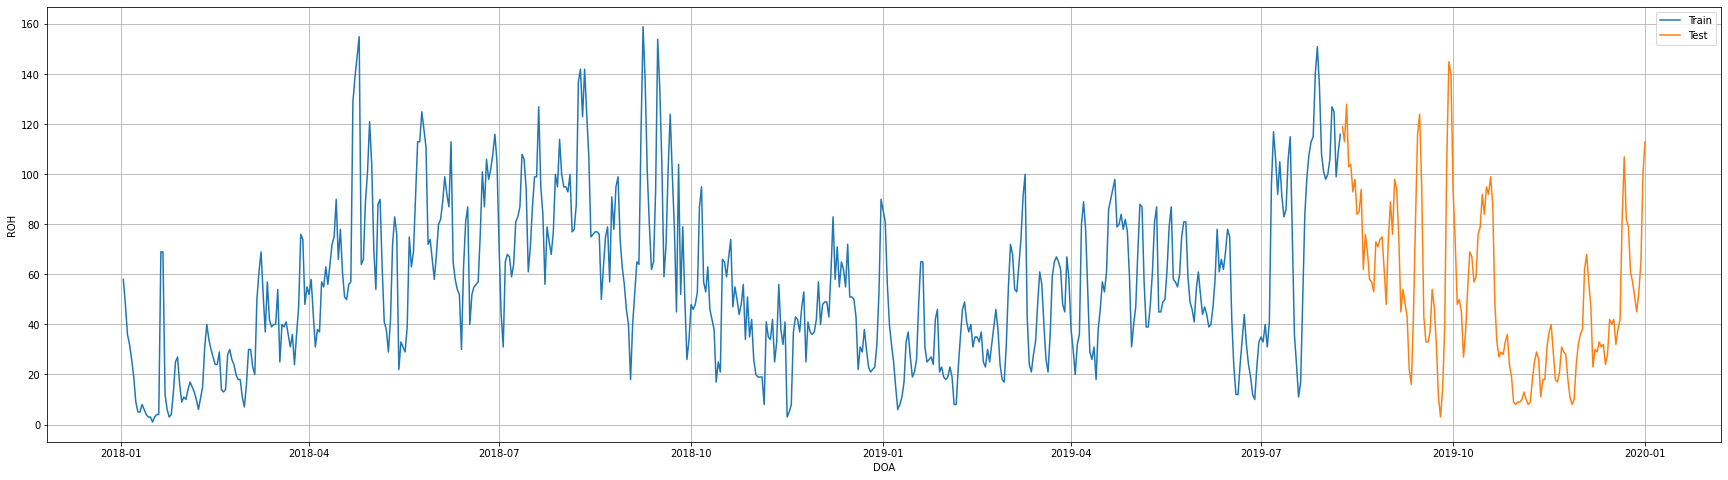

In [5]:
plt.plot(train[train['DBA']==0].index, train[train['DBA']==0]['ROH'], label='Train')
plt.plot(test[test['DBA']==0].index, test[test['DBA']==0]['ROH'], label='Test')
plt.xlabel('DOA')
plt.ylabel('ROH')
plt.legend(loc='best')
plt.show()

In [6]:
## from Nural Network cycle attributes from datetime 
# day = 24*60*60
# year = (365.2425)*day
# timestamp_s = df['DOA'].map(datetime.timestamp)
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
# df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
# df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Day sin'])[:100])
# plt.plot(np.array(df['Day cos'])[:100])
# plt.xlabel('Time [h]')
# plt.title('Time of day signal')

In [7]:
df.head(10)

,DBA,LAR,ADR,Rooms,ROH,DOW,Mon,Day
DOA,,,,,,,,
2018-01-01 00:00:00,89.0,40.47,40.470000,290.0,209.0,0,1,1
2018-01-01 00:16:00,88.0,40.47,40.470000,290.0,206.0,0,1,1
2018-01-01 00:32:00,87.0,36.03,69.386667,290.0,206.0,0,1,1
2018-01-01 00:48:00,86.0,36.03,69.386667,290.0,198.0,0,1,1
2018-01-01 01:04:00,85.0,40.47,40.470000,290.0,204.0,0,1,1
2018-01-01 01:20:00,84.0,36.03,84.950000,290.0,198.0,0,1,1
2018-01-01 01:36:00,83.0,62.71,62.710000,290.0,196.0,0,1,1
2018-01-01 01:52:00,82.0,62.71,62.710000,290.0,199.0,0,1,1
2018-01-01 02:08:00,81.0,62.71,62.710000,290.0,197.0,0,1,1


In [8]:
scaler = StandardScaler()
df[['DBA','DOW','Mon','Day','LAR','ROH']] = scaler.fit_transform(df[['DBA','DOW','Mon','Day','LAR','ROH']])

In [9]:
df.head(10)

,DBA,LAR,ADR,Rooms,ROH,DOW,Mon,Day
DOA,,,,,,,,
2018-01-01 00:00:00,1.712912,-0.947060,40.470000,290.0,1.151441,-1.500347,-1.601886,-1.681444
2018-01-01 00:16:00,1.674419,-0.947060,40.470000,290.0,1.109394,-1.500347,-1.601886,-1.681444
2018-01-01 00:32:00,1.635927,-1.057879,69.386667,290.0,1.109394,-1.500347,-1.601886,-1.681444
2018-01-01 00:48:00,1.597434,-1.057879,69.386667,290.0,0.997267,-1.500347,-1.601886,-1.681444
2018-01-01 01:04:00,1.558942,-0.947060,40.470000,290.0,1.081362,-1.500347,-1.601886,-1.681444
2018-01-01 01:20:00,1.520450,-1.057879,84.950000,290.0,0.997267,-1.500347,-1.601886,-1.681444
2018-01-01 01:36:00,1.481957,-0.391965,62.710000,290.0,0.969235,-1.500347,-1.601886,-1.681444
2018-01-01 01:52:00,1.443465,-0.391965,62.710000,290.0,1.011283,-1.500347,-1.601886,-1.681444
2018-01-01 02:08:00,1.404972,-0.391965,62.710000,290.0,0.983251,-1.500347,-1.601886,-1.681444


In [10]:
y = train.pop('ROH')
X = train

In [23]:
svm_reg = LinearSVR(epsilon=1.5)
model_reg = svm_reg.fit(X, y)
test['svm_reg'] = svm_reg.predict(test.loc[:, test.columns != 'ROH']) 

In [11]:
XX = X.iloc[:30]
yy = y.iloc[:30]

In [17]:
from sklearn.model_selection import GridSearchCV
param = {'kernel' : ('linear', 'rbf'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

modelsvr = SVR()

grids = GridSearchCV(estimator=modelsvr,param_grid=param,cv=5,scoring='neg_mean_absolute_error')

grids.fit(XX,yy)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'rbf')},),
             scoring='neg_mean_absolute_error')

In [23]:
grids.best_params_

{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}

In [22]:
grids.best_estimator_

SVR(C=10, coef0=0.01, gamma='auto', kernel='linear')

In [50]:
svr_rbf = SVR(kernel='rbf', C=1, gamma='auto', epsilon=.1)
model_rbf = svr_rbf.fit(XX,yy)
test['svm_rbf'] = model_rbf.predict(test[['DBA','LAR','ADR','Rooms','DOW','Mon','Day']]) 

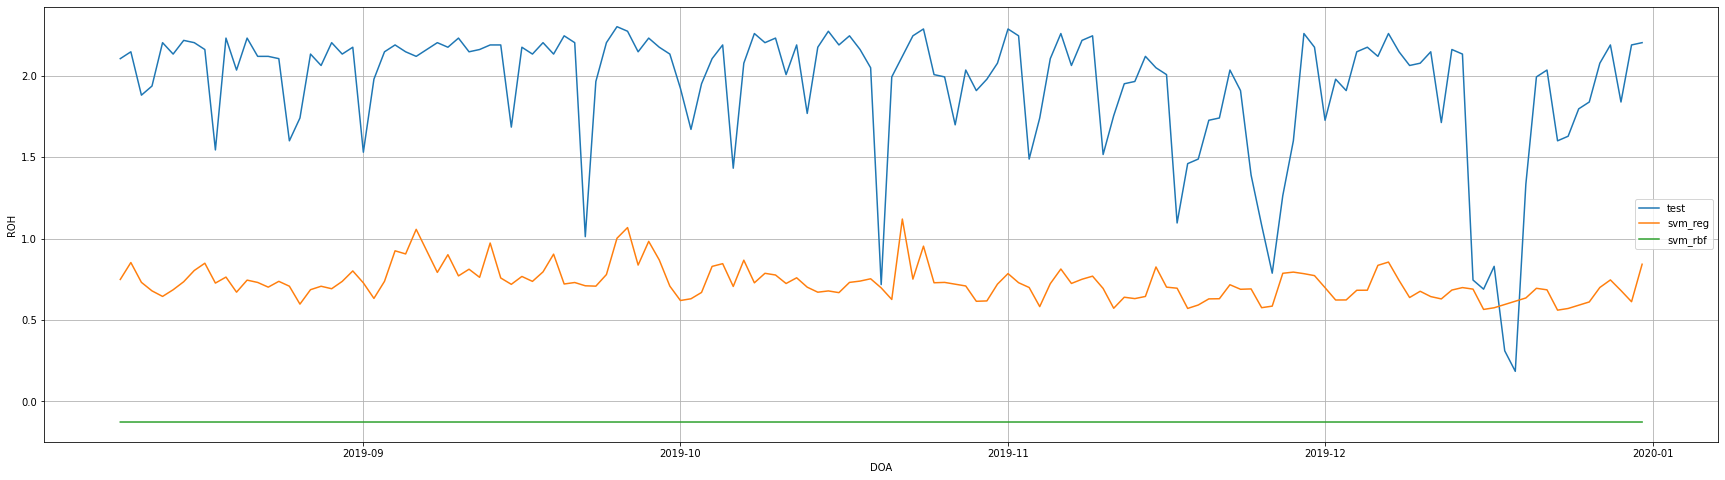

In [51]:
dx = test[test['DBA']==test['DBA'].max()]

plt.plot(dx.index, dx['ROH'], label='test')
plt.plot(dx.index, dx['svm_reg'], label='svm_reg')
plt.plot(dx.index, dx['svm_rbf'], label='svm_rbf')
plt.xlabel('DOA')
plt.ylabel('ROH')
plt.legend(loc='best')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse = mean_squared_error(test['ROH'], test['svm_reg'])
mae = mean_absolute_error(test['ROH'], test['svm_reg'])
r2  = r2_score(test['ROH'], test['svm_reg'])

print('SVM Reg MSE: %0.3f MAE: %0.3f R2: %03f'%(mse,mae,r2))

# mse = mean_squared_error(test['ROH'], test['svm_rbf'])
# mae = mean_absolute_error(test['ROH'], test['svm_rbf'])
# r2  = r2_score(test['ROH'], test['svm_rbf'])

# print('SVM Rbf MSE: %0.3f MAE: %0.3f R2: %03f'%(mse,mae,r2))

SVM Reg MSE: 0.572 MAE: 0.642 R2: 0.479245


In [22]:
from sklearn.model_selection import cross_validate

scoring = {'r2':'r2', 'MSE':'neg_mean_squared_error'}
for degree in range(2,7):
    res = cross_validate(polynomialRegression(degree), X, y, cv=270,scoring=scoring, return_train_score=True)
    
    print("Poly degree:",degree)
    print("R2  Test Score: %0.2f (+/- %0.2f)) | Train Score: %0.2f (+/- %0.2f))"%(res['test_r2'].mean(),res['test_r2'].std()* 2,res['train_r2'].mean(),res['train_r2'].std()* 2))
    print("MSE Test Score: %0.2f (+/- %0.2f)) | Train Score: %0.2f (+/- %0.2f))"%(res['test_MSE'].mean(),res['test_MSE'].std()* 2,res['train_MSE'].mean(),res['train_MSE'].std()* 2))
    print("RMSE Test Score: %0.2f (+/- %0.2f)) | Train Score: %0.2f (+/- %0.2f))"%(np.sqrt(-res['test_MSE']).mean(),np.sqrt(-res['test_MSE']).std()* 2,np.sqrt(-res['train_MSE']).mean(),np.sqrt(-res['test_MSE']).std()* 2))

NameError: name 'polynomialRegression' is not defined

# With ROH

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR,LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = pd.read_pickle('../dataset/preprocessed/284_imputed.pkl')
# df = pd.read_pickle('../dataset/preprocessed/1479_imputed.pkl')

In [3]:
df.head()

,DOA,LeadTime,DOW,Price,TotalCapacity,ROH
0,2018-01-01,88,0,76.05,290.0,58.0
1,2018-01-01,87,0,76.05,290.0,58.0
2,2018-01-01,85,0,76.05,290.0,58.0
3,2018-01-01,81,0,76.05,290.0,63.0
4,2018-01-01,80,0,76.05,290.0,62.0


In [4]:
df = df.rename(columns={'Reservations':'ROH'})
scaler = StandardScaler()
df[['DOW','Price','ROH']] = scaler.fit_transform(df[['DOW','Price','ROH']])
df = df.pivot(index='DOA',columns='LeadTime',values='ROH')
df = df.bfill(axis=1).ffill(axis=1)

In [5]:
# df = df.drop(columns=[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,19,21])
cols = df.columns[df.columns.isin([89,79,69,59,49,39,29,19,9,0])]
df = df[cols]

In [6]:
df['DOW'] = df.index.dayofweek

In [7]:
df.head()

LeadTime,0,9,19,29,39,49,59,69,79,89,DOW
DOA,,,,,,,,,,,
2018-01-01,1.112380,0.832724,0.622982,0.301378,0.035705,-0.174036,-0.565554,-0.803262,-0.943090,-0.999021,0
2018-01-02,1.308139,0.776793,0.385275,0.119602,-0.160054,-0.453692,-0.747331,-0.971055,-1.082917,-1.138849,1
2018-01-03,1.517881,0.553069,0.049688,-0.202002,-0.411744,-0.789279,-0.985038,-1.152831,-1.250711,-1.306642,2
2018-01-04,1.461950,0.315361,0.021723,-0.551572,-0.719365,-0.985038,-1.096900,-1.264694,-1.348590,-1.362573,3
2018-01-05,1.839485,0.399258,-0.202002,-0.579537,-0.901141,-1.040969,-1.194780,-1.306642,-1.404521,-1.446470,4


In [18]:
from sklearn.model_selection import KFold

df_train    = df.loc[:'2019-10']
df_test     = df.loc['2019-10':]

y = df_train.pop(0)
X = df_train

result = {'train':[],'test':[]}
kf = KFold(random_state=None, shuffle=False, n_splits=16)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
    model_rbf = svr_rbf.fit(X_train, y_train)

    # svm_reg = LinearSVR(epsilon=0.5)
    # model_rbf = svm_reg.fit(X_train, y_train) # temp name change
    
    train_svm_rbf = model_rbf.predict(X_train)     
    test_svm_rbf = model_rbf.predict(X_test) 

    train_rmse = np.mean((y_train - train_svm_rbf)**2)**.5  # RMSE
    test_rmse = np.mean((y_test - test_svm_rbf)**2)**.5  # RMSE
    result['train'].append(train_rmse)
    result['test'].append(test_rmse)
    print("Train RMSE ::",round(train_rmse,3),"\tTest RMSE ::",round(test_rmse,3))

print("Mean Train RMSE ::",round(np.mean(result['train']),3),"\tMean Test RMSE ::",round(np.mean(result['test']),3))


Train RMSE :: 0.234 	Test RMSE :: 0.4
Train RMSE :: 0.24 	Test RMSE :: 0.203
Train RMSE :: 0.241 	Test RMSE :: 0.197
Train RMSE :: 0.233 	Test RMSE :: 0.326
Train RMSE :: 0.237 	Test RMSE :: 0.237
Train RMSE :: 0.229 	Test RMSE :: 0.369
Train RMSE :: 0.235 	Test RMSE :: 0.308
Train RMSE :: 0.243 	Test RMSE :: 0.111
Train RMSE :: 0.18 	Test RMSE :: 0.679
Train RMSE :: 0.244 	Test RMSE :: 0.129
Train RMSE :: 0.243 	Test RMSE :: 0.097
Train RMSE :: 0.242 	Test RMSE :: 0.136
Train RMSE :: 0.241 	Test RMSE :: 0.126
Train RMSE :: 0.24 	Test RMSE :: 0.188
Train RMSE :: 0.243 	Test RMSE :: 0.112
Train RMSE :: 0.243 	Test RMSE :: 0.144
Mean Train RMSE :: 0.236 	Mean Test RMSE :: 0.235


In [10]:
# from sklearn.model_selection import TimeSeriesSplit

# df_train    = df.loc[:'2019-10']
# df_test     = df.loc['2019-10':]

# y = df_train.pop(0)
# X = df_train

# tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)

# for train_index, test_index in tscv.split(X):
#     # print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
#     model_rbf = svr_rbf.fit(X_train, y_train)

#     # svm_reg = LinearSVR(epsilon=0.5)
#     # model_rbf = svm_reg.fit(X_train, y_train) # temp name change
    
#     train_svm_rbf = model_rbf.predict(X_train)     
#     test_svm_rbf = model_rbf.predict(X_test) 

#     train_rmse = np.mean((y_train - train_svm_rbf)**2)**.5  # RMSE
#     test_rmse = np.mean((y_test - test_svm_rbf)**2)**.5  # RMSE

#     print("Train RMSE ::",round(train_rmse,3),"\tTest RMSE ::",round(test_rmse,3))


In [19]:
pred = model_rbf.predict(df_test.loc[:, df_test.columns != 0]) 

In [20]:
df_test['svm_rbf'] = pred

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test.index, y=df_test[0],mode='markers+lines',name='True'))
# fig.add_trace(go.Scatter(x=df_test.index, y=df_test['svm_reg'],mode='markers+lines',name='svm_reg'))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['svm_rbf'],mode='markers+lines',name='svm_rbf'))

fig.update_layout(autosize=False,width=1000,height=400,xaxis_title="Reservations on Hand (ROH)",yaxis_title="Day of Arrival (DOA)")
fig.show()   

In [12]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae  = np.mean(np.abs(forecast - actual))    # MAE
    mpe  = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':round(mape,3), 'mae':round(mae,3) , 'mpe':round(mpe,3) , 'rmse':round(rmse,3)})

In [23]:
# print("SVM Regression ",forecast_accuracy(df_test['svm_reg'],df_test[0]))
print("SVM Radial     ",forecast_accuracy(df_test['svm_rbf'],df_test[0]))

SVM Radial      {'mape': 0.289, 'mae': 0.212, 'mpe': 0.254, 'rmse': 0.333}


# Compile

In [6]:
from sklearn.model_selection import KFold

In [7]:
clean_hotels = [1041, 269, 4290, 48, 317, 151, 322, 1968, 1100, 284, 86, 199, 80, 577, 148, 1479] 
_result = {hotelId:{'mae':None,'rmse':None} for hotelId in clean_hotels}

In [13]:
for hotelId in clean_hotels:
    df = pd.read_pickle('../dataset/preprocessed/'+str(hotelId)+'_imputed.pkl')
    #preprocessing 
    df = df.rename(columns={'Reservations':'ROH'})
    scaler = StandardScaler()
    df[['LAR','ROH']] = scaler.fit_transform(df[['LAR','ROH']])
    df = df.pivot(index='DOA',columns='DBA',values='ROH')
    df = df.bfill(axis=1).ffill(axis=1)
    # df = df.drop(columns=[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,19,21])
    cols = df.columns[df.columns.isin([89,79,69,59,49,39,29,19,9,0])]
    df = df[cols]
    # df['DOW'] = df.index.dayofweek
    #kfold validation 

    df_train    = df.loc[:'2019-10']
    df_test     = df.loc['2019-10':]

    y = df_train.pop(0)
    X = df_train

    result = {'train':[],'test':[]}
    kf = KFold(random_state=None, shuffle=False, n_splits=16)

    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        svr_rbf = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
        model_rbf = svr_rbf.fit(X_train, y_train)

        # svm_reg = LinearSVR(epsilon=0.5)
        # model_rbf = svm_reg.fit(X_train, y_train) # temp name change
        
        train_svm_rbf = model_rbf.predict(X_train)     
        test_svm_rbf = model_rbf.predict(X_test) 

        train_rmse = np.mean((y_train - train_svm_rbf)**2)**.5  # RMSE
        test_rmse = np.mean((y_test - test_svm_rbf)**2)**.5  # RMSE
        result['train'].append(train_rmse)
        result['test'].append(test_rmse)
        # print("Train RMSE ::",round(train_rmse,3),"\tTest RMSE ::",round(test_rmse,3))

    print("Mean Train RMSE ::",round(np.mean(result['train']),3),"\tMean Test RMSE ::",round(np.mean(result['test']),3))
    #predict 
    pred = model_rbf.predict(df_test.loc[:, df_test.columns != 0]) 
    df_test['svm_rbf'] = pred
    # result 
    # fig = go.Figure()
    # fig.add_trace(go.Scatter(x=df_test.index, y=df_test[0],mode='markers+lines',name='True'))
    # # fig.add_trace(go.Scatter(x=df_test.index, y=df_test['svm_reg'],mode='markers+lines',name='svm_reg'))
    # fig.add_trace(go.Scatter(x=df_test.index, y=df_test['svm_rbf'],mode='markers+lines',name='svm_rbf'))

    # fig.update_layout(autosize=False,width=1000,height=400,xaxis_title="Reservations on Hand (ROH)",yaxis_title="Day of Arrival (DOA)")
    # fig.show()   
    # performance
    perfor = forecast_accuracy(df_test['svm_rbf'],df_test[0])
    print("SVM Radial     ",perfor)
    _result[hotelId]['mae'] = perfor['mae']
    _result[hotelId]['rmse'] = perfor['rmse']


Mean Train RMSE :: 0.202 	Mean Test RMSE :: 0.218
SVM Radial      {'mape': 0.299, 'mae': 0.14, 'mpe': 0.071, 'rmse': 0.198}
Mean Train RMSE :: 0.224 	Mean Test RMSE :: 0.227
SVM Radial      {'mape': 0.215, 'mae': 0.098, 'mpe': 0.141, 'rmse': 0.143}
Mean Train RMSE :: 0.444 	Mean Test RMSE :: 0.479
SVM Radial      {'mape': 0.109, 'mae': 0.069, 'mpe': 0.04, 'rmse': 0.089}
Mean Train RMSE :: 0.224 	Mean Test RMSE :: 0.227
SVM Radial      {'mape': 0.215, 'mae': 0.098, 'mpe': 0.141, 'rmse': 0.143}
Mean Train RMSE :: 0.094 	Mean Test RMSE :: 0.113
SVM Radial      {'mape': 0.08, 'mae': 0.075, 'mpe': 0.005, 'rmse': 0.094}
Mean Train RMSE :: 0.103 	Mean Test RMSE :: 0.134
SVM Radial      {'mape': 0.094, 'mae': 0.085, 'mpe': 0.022, 'rmse': 0.109}
Mean Train RMSE :: 0.145 	Mean Test RMSE :: 0.162
SVM Radial      {'mape': 0.096, 'mae': 0.099, 'mpe': -0.016, 'rmse': 0.156}
Mean Train RMSE :: 0.095 	Mean Test RMSE :: 0.134
SVM Radial      {'mape': 0.241, 'mae': 0.173, 'mpe': -0.07, 'rmse': 0.373}
Me

In [ ]:
_result